# Data preparation and visualisation

By the end of the tutorials of this week, you should acquire:

**Knowledge on:**
* Using basic Natural Language Processing 
* Considerations about unit of analysis
* Descriptive exploration of data to answer RQ
* Univariate data visualization 
* Bivariate data visualization
* Reporting and interpretation

**Skills:**
* .apply() and selection of functions based on existing list
* .drop_duplicates()
* Using Seaborn 
* Choosing the appropriate chart for visualizations
* Interpreting visualizations and descriptives
* Writing up report in Markdown

# Before starting: Installing seaborn

In terminal (or Anaconda Prompt), type:

```conda install seaborn```

# What we will do today?

We will continue with the research questions we had for DA3, and the dataset that we prepared for this analysis. However,we have added some more interesting research questions and made them more sophisticated. 

So our RQ's now are:
* RQ1. To what extent does the sentiment expressed in the title of the video influence user engagement (views, likes and dislikes)?
* RQ2. To what extent does the sentiment expressed in the title of the video vary depending on the category in which the video is published?
* RQ3. To what extent does the sentiment expressed in the title of the video vary depending on whether Joe Biden is mentioned in the video?
* RQ3a. To what extent the category of the video is related to mentions of Joe Biden in the video?

This means that we:
* Are missing a category if Joe Biden was mentioned 
* Sentiment measure for the video titles

*Last week we have made a variables with four categories so we do not need to repeat that step*

*Note: I am sure that the research question you'll write for Assignment 1 will be a lot more interesting - and written in a much better way ;-)*





## Loading the modules we need

Please note how we are now also loading seaborn (a data visualization module). We also include the ```%matplotlib inline``` to tell Jupyter Notebook to show the charts in the notebook itself.

In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

## Loading the data

Last week I have already been working with the data on videos. Now I will load the pickle file I created at the end of the last tutorial.

In [2]:
videos = pd.read_pickle('videos_sentiment.pkl')

In [3]:
len(videos)

368

In [4]:
videos.columns

Index(['channelId', 'channelTitle', 'videoId', 'publishedAt', 'publishedAtSQL',
       'videoTitle', 'videoDescription', 'tags', 'videoCategoryId',
       'videoCategoryLabel', 'duration', 'durationSec', 'dimension',
       'definition', 'caption', 'thumbnail_maxres', 'licensedContent',
       'viewCount', 'likeCount', 'dislikeCount', 'favoriteCount',
       'commentCount', 'dislikeCount_no_na', 'lang_title', 'negative',
       'positive', 'neutral', 'category'],
      dtype='object')

My unit for analysis is for the research question is a video. I am interested in relations between charactertistics of the title and engagement the video generates. Not to inflate the relation, I need to make sure that each video is only once in my dataset.

In [5]:
videos['videoId'].value_counts()

UcdgDbMpS5Q    4
0sNP5jgDa_g    4
EuwMB1Dal-4    4
NIDEvBH8QXM    4
xkgt1Avnvw0    1
              ..
kPTKX6nUqT0    1
8z7QDr0Yl7A    1
m5TL23ExlEg    1
xE3s4RkBKLA    1
G9AxUZwENfc    1
Name: videoId, Length: 356, dtype: int64

In [6]:
videos.loc[videos['videoId'] == '0sNP5jgDa_g']

,channelId,channelTitle,videoId,publishedAt,publishedAtSQL,videoTitle,videoDescription,tags,videoCategoryId,videoCategoryLabel,...,likeCount,dislikeCount,favoriteCount,commentCount,dislikeCount_no_na,lang_title,negative,positive,neutral,category
333,UCxcrzzhQDj5zKJbXfIscCtg,ABC News In-depth,0sNP5jgDa_g,2021-04-20 01:32:14+00:00,2021-04-20 01:32:14,Climate Emergency: Australia on the frontline ...,This week the new US President Joe Biden will ...,"news,abc,abc news,australia,climate change,glo...",25,News & Politics,...,492.000,69.000,0,442.000,69.000,en,-1,1,0,News & Politics
334,UCxcrzzhQDj5zKJbXfIscCtg,ABC News In-depth,0sNP5jgDa_g,2021-04-20 01:32:14+00:00,2021-04-20 01:32:14,Climate Emergency: Australia on the frontline ...,This week the new US President Joe Biden will ...,"news,abc,abc news,australia,climate change,glo...",25,News & Politics,...,492.000,69.000,0,442.000,69.000,en,-1,1,0,News & Politics
335,UCxcrzzhQDj5zKJbXfIscCtg,ABC News In-depth,0sNP5jgDa_g,2021-04-20 01:32:14+00:00,2021-04-20 01:32:14,Climate Emergency: Australia on the frontline ...,This week the new US President Joe Biden will ...,"news,abc,abc news,australia,climate change,glo...",25,News & Politics,...,492.000,69.000,0,442.000,69.000,en,-1,1,0,News & Politics
336,UCxcrzzhQDj5zKJbXfIscCtg,ABC News In-depth,0sNP5jgDa_g,2021-04-20 01:32:14+00:00,2021-04-20 01:32:14,Climate Emergency: Australia on the frontline ...,This week the new US President Joe Biden will ...,"news,abc,abc news,australia,climate change,glo...",25,News & Politics,...,492.000,69.000,0,442.000,69.000,en,-1,1,0,News & Politics


In [7]:
videos = videos.drop_duplicates(subset ="videoId",
                     ignore_index=True)

In [8]:
len(videos)

356

## Data cleaning and preparation

The file has 
* all the information on a video (title, views, likes, dislikes), 
* information on sentiment of the title that I added last week
* category variable created last week.

What I am missing is 
* if the video mentions Joe Biden

### Creating a new binary variable

I'll also use a function available in the ```UsefulFunctions``` notebook inside the ```UsefulScripts``` folder.

This funcation uses regular expressions that we have heard about last week. Let's see if we can understand how it exactly works

In [9]:
def wordlist_any_present(text, query):
    import re
    text = str(text).lower()
    newquery = []
    for word in query:
        newquery.append(str(word).lower())
    tokens = re.findall(r"[\w']+|[.,!?;$@#]", text)
    
    for word in newquery:
        if word in tokens:
            return 1
    return 0

In [10]:
#Testing the function
wordlist_any_present("This is a text", ["text", "texts"])

1

In [11]:
wordlist_any_present("This is a text", ["text", "texts"])

0

In [15]:
#The additional comma is added as otherwise the () are not recognized as a tuple
videos['biden_tag'] = videos['tags'].apply(wordlist_any_present, args=(['biden', 'joe'],)) 

In [16]:
videos['biden_title'] = videos['videoTitle'].apply(wordlist_any_present, args=(['biden', 'joe'],)) 

In [17]:
videos['biden_description'] = videos['videoDescription'].apply(wordlist_any_present, args=(['biden', 'joe'],)) 

In [18]:
videos['biden_title'].value_counts()

0    335
1     21
Name: biden_title, dtype: int64

In [19]:
videos['biden_tag'].value_counts()

0    319
1     37
Name: biden_tag, dtype: int64

In [20]:
videos['biden_description'].value_counts()

0    322
1     34
Name: biden_description, dtype: int64

In [21]:
def categorise_df(row):
    # Here I am creating a new column (called user_type) and giving it a default value (regular user)
    row['biden_mentioned'] = 0
    # I can put the conditions I want here
    if (row['biden_tag'] == 1) or (row['biden_title'] == 1) or (row['biden_description'] == 1):
        row['biden_mentioned'] = 1
        
    # You can modify this function as much as you want (above), but it must always return the row
    return row 

In [22]:
videos = videos.apply(categorise_df, axis=1)

In [23]:
videos['biden_mentioned'].value_counts()

0    308
1     48
Name: biden_mentioned, dtype: int64

### Sentiment

#### Important note:
Here I will only run (very quickly) some of the steps that we also saw on DA3 and in the solution video. Please keep in mind that this is not comprehensive, and that actually some of the items being done here are incomplete. You'll need to be more thorough for A1 - and potentially also for the Weekly Challenges :-)

In [24]:
videos['positive'] = videos['positive'].apply(pd.to_numeric)

In [25]:
videos['negative'] = videos['negative'].apply(pd.to_numeric)

In [26]:
videos['sentiment_overall'] = videos['negative'] + videos['positive']

# Data Exploration

The data exploration is the moment in which - **after all the data cleaning is done** - you can see how the data finally look like, and report this out to the stakeholders reading your report. It is important that:
* You provide enough information so that the stakeholder understands how the important variables look like
* You provide **only** the relevant information, to prevent *confusing* the stakeholder
* You provide explanations in MarkDown, including (a) the definition of the variables and (b) the interpretation of the exploration

I will not make a complete example here - this is something you need to work out for A1 - but I will demonstrate some key aspects you need to consider. Keep in mind your own report (and even the weekly challenge) needs to contain text in MarkDown meeting the requirements above.




I will focus on only three RQs for this example: 
* RQ1. To what extent does the sentiment expressed in the title of the video influence user engagement (views, likes and dislikes)?
* RQ3. To what extent does the sentiment expressed in the title of the video vary depending on whether Joe Biden is mentioned in the video?
* RQ3a. To what extent the category of the video is related to mentions of Joe Biden on the title?


### Let's first consider the variables we have in the RQs:
* Sentiment: interval (or continuous)
* Views: continuous
* Likes: continuous
* Dislikes: continous
* Category of the video: categorical (multiple options)
* Mentions to Biden: binary (dichotomous)

This influences how we describe the variables, and how we visualize them (alone, and combined)

## Descriptives

In [27]:
videos[['sentiment_overall', 'viewCount', 'likeCount', 'dislikeCount']].describe()

,sentiment_overall,viewCount,likeCount,dislikeCount
count,356.000,356.000,356.000,356.000
mean,-0.354,181912.576,4477.382,429.388
std,0.861,718361.132,19526.898,2666.917
min,-4.000,0.000,0.000,0.000
25%,0.000,2245.250,54.750,8.000
50%,0.000,15707.000,262.000,51.000
75%,0.000,81258.000,1638.500,165.000
max,2.000,7435424.000,267054.000,45290.000


In [28]:
videos['biden_mentioned'].value_counts(normalize=True)

0   0.865
1   0.135
Name: biden_mentioned, dtype: float64

In [29]:
videos['category'].value_counts(normalize=True)

News & Politics                     0.593
Other                               0.191
Education, Science and Technology   0.174
Nonprofits & Activism               0.042
Name: category, dtype: float64

In [30]:
videos.groupby(['biden_mentioned'])['sentiment_overall'].describe()

,count,mean,std,min,25%,50%,75%,max
biden_mentioned,,,,,,,,
0,308.000,-0.357,0.856,-4.000,0.000,0.000,0.000,2.000
1,48.000,-0.333,0.907,-4.000,0.000,0.000,0.000,1.000


In [31]:
videos.groupby(['category', 'biden_mentioned'])['sentiment_overall'].describe()

count   mean   std    min  \
category                          biden_mentioned                               
Education, Science and Technology 0                62.000 -0.177 0.713 -3.000   
News & Politics                   0               166.000 -0.452 0.885 -4.000   
                                  1                45.000 -0.356 0.933 -4.000   
Nonprofits & Activism             0                15.000 -0.800 1.014 -2.000   
Other                             0                65.000 -0.185 0.808 -3.000   
                                  1                 3.000  0.000 0.000  0.000   

                                                     25%   50%   75%   max  
category                          biden_mentioned                           
Education, Science and Technology 0                0.000 0.000 0.000 1.000  
News & Politics                   0               -1.000 0.000 0.000 2.000  
                                  1                0.000 0.000 0.000 1.000  
Nonprofits & Activism             0               -2.000 0.000 0.000 0.000  
Other                             0                0.000 0.000 0.000 2.000  
                                  1                0.000 0.000 0.000 0.000

#### Important tip:
For every descriptive you are giving, you should have one MarkDown cell before it explaining what is being done - and defining what the variable is - and another after it to interpret the results (preferably using APA format).

# Visualizations

For every variable in a RQ (i.e., a key variable), I need to create (and interpret) a univariate visualisation. We'll use the seaborn package for this. 

Seaborn is one of the most used visualization packages in Python. It is quite intuitive to use - it has a fixed grammar meaning you always need to provide it with certain arguments.

You always need:
* data: which dataframe you want to plot
* x, y: what will be plotted on the x-axis and y-axis

But you have more options:
* hue: which column to use for grouping of the data by colors
* col: which column to use to group the data into subplots
* kind: sometimes you can specify the type of plot
* style: which column to use to group the data into different styles
* ...


<AxesSubplot:xlabel='biden_mentioned', ylabel='count'>

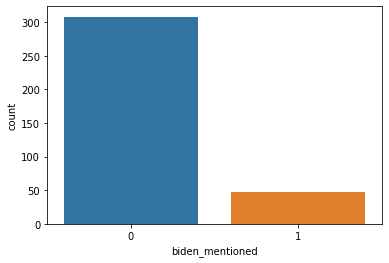

In [36]:
sns.countplot(x = 'biden_mentioned', data=videos)

<AxesSubplot:xlabel='biden_mentioned', ylabel='count'>

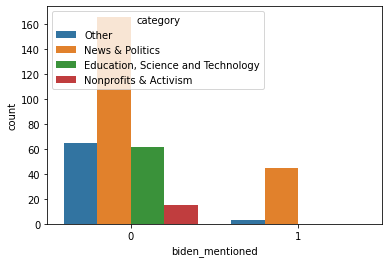

In [40]:
sns.countplot(x = 'biden_mentioned', hue='category', data=videos)

The great advantage of seaborn is that it easily allows you to add variables, change styles, looks etc. Below, there are some examples how you can set a theme or change color palette. The website of seaborn includes a [gallery](https://seaborn.pydata.org/examples/index.html) that you can use for inspiration. Make sure to follow the basic grammar and experiment to add different elements and change styles. 

<AxesSubplot:xlabel='biden_mentioned', ylabel='count'>

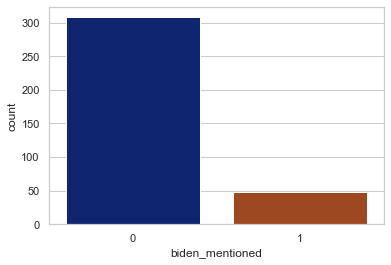

In [44]:
sns.set_theme(style="whitegrid")
sns.countplot(x = 'biden_mentioned', data=videos, palette="dark")

## Types of visualizations

We can distinguish between univariate and bivariate plots. Univariate plots visualize one variable, while bivariate plots show the relation between variables.

Looking at seaborn options, we can distinguish
* Relational plots - that show a relation between two continous variables
* Distribution plots - that show distributions of continous variables
* Categorical plots - that show distributions of categorical variables. 

The figure below shows you the options you have in seaborn. Experiment with them!

![graph types](SNSoptions.png)

### Univariate visualizations

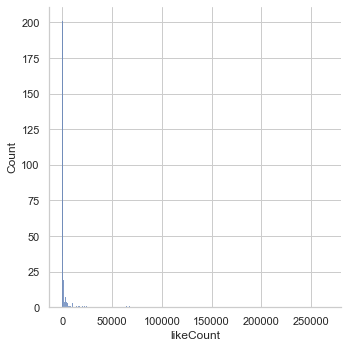

In [60]:
#Distribution of continous variables
sns.displot(x = 'sentiment_overall', data = videos)

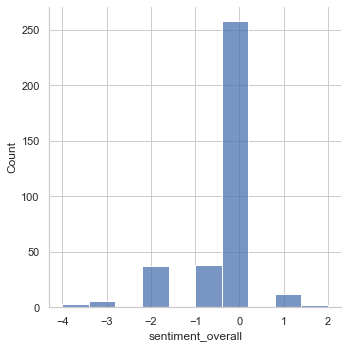

In [61]:
sns.displot(x = 'likeCount', data = videos)

<AxesSubplot:xlabel='biden_mentioned', ylabel='count'>

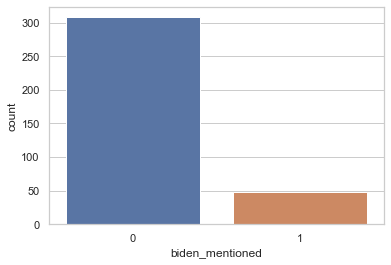

In [62]:
#Distribution of categorical variable
sns.countplot(x = 'biden_mentioned', data=videos)

<AxesSubplot:xlabel='category', ylabel='count'>

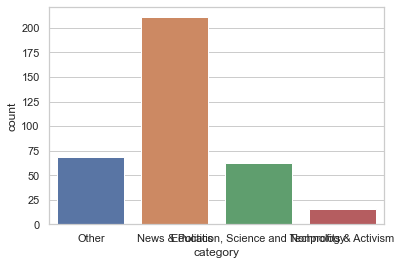

In [63]:
sns.countplot(x='category', data=videos)

<AxesSubplot:xlabel='count', ylabel='category'>

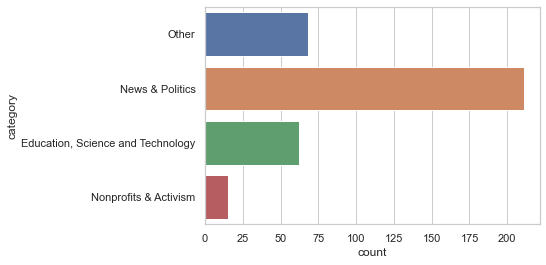

In [64]:
sns.countplot(y='category', data=videos)

## Bivariate visualizations

For every relationship in a RQ (i.e., an IV vs. a DV), I need to create (and interpret) a bivariate visualisation. 

RQ1. To what extent does the sentiment expressed in the title of the video influence user engagement (views, likes and dislikes)?

<AxesSubplot:xlabel='sentiment_overall', ylabel='viewCount'>

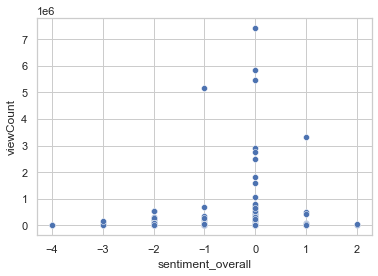

In [67]:
#Relation between two continous variables
sns.scatterplot(x='sentiment_overall', y='viewCount', data=videos)

<AxesSubplot:xlabel='sentiment_overall', ylabel='likeCount'>

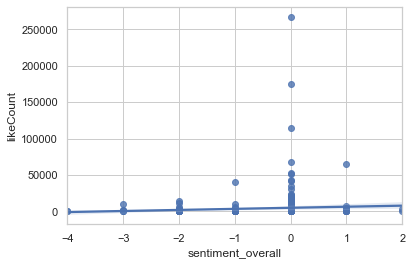

In [70]:
sns.regplot(x='sentiment_overall', y='likeCount', data=videos)

<AxesSubplot:xlabel='sentiment_overall', ylabel='dislikeCount'>

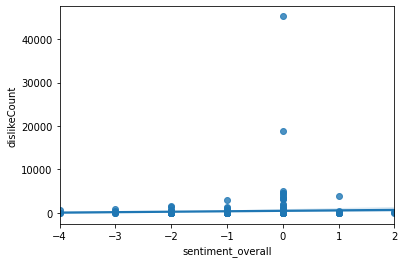

In [53]:
sns.regplot(x='sentiment_overall', y='dislikeCount', data=videos)

RQ3. To what extent does the sentiment expressed in the title of the video vary depending on whether Joe Biden is mentioned?

<AxesSubplot:xlabel='biden_mentioned', ylabel='sentiment_overall'>

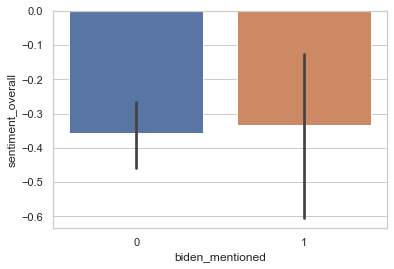

In [71]:
#Relation between a categorical variable and a continous variable
sns.barplot(x='biden_mentioned', y='sentiment_overall', data=videos)

<AxesSubplot:xlabel='biden_mentioned', ylabel='sentiment_overall'>

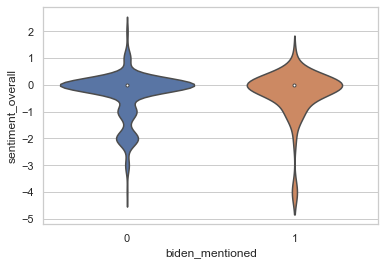

In [74]:
sns.violinplot(x='biden_mentioned', y='sentiment_overall', data=videos)

RQ3a. To what extent the category of the video is related to mentions of Joe Biden on the title?

<AxesSubplot:xlabel='category', ylabel='biden_mentioned'>

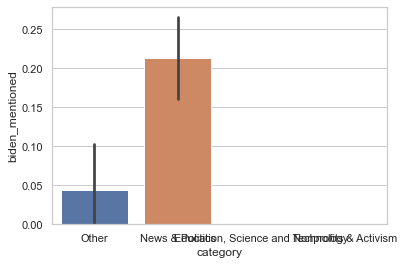

In [72]:
#Relation between a categorical variable and a continous variable
sns.barplot(x='category', y='biden_mentioned', data=videos)

<AxesSubplot:xlabel='biden_mentioned', ylabel='category'>

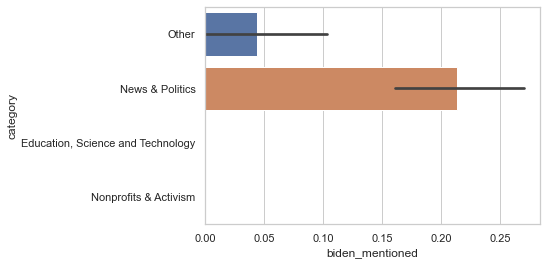

In [73]:
sns.barplot(y='category', x='biden_mentioned', data=videos)

We can also include more than two variables in a graph. Options such as `hue` allow us to do so.

<AxesSubplot:xlabel='sentiment_overall', ylabel='viewCount'>

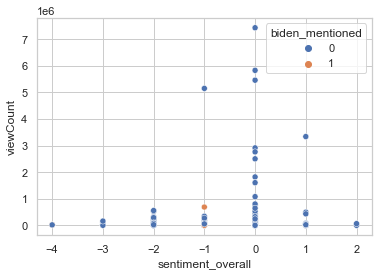

In [75]:
#Relation between two continous variables split by a binary variable
sns.scatterplot(x='sentiment_overall', y='viewCount', hue = 'biden_mentioned', data=videos)

## Bonus: other packages to explore you data

As we mentioned in the first class, one of the large advantages of python is the numerous packages written by users. One of the is `pandas_profiling` ([documentation](https://pandas-profiling.ydata.ai/docs/master/index.html])). It generates interactive reports from pandas dataframes. The reports include distributions of variables, descriptive statistics, relations between numerical variables, correlations, overview of missing values and shows you a few rows of the data. It is another quick way to get an overview of your data. Let's make such a report (keep in mind that it runs a lot of operations and hence takes time...). 

In [77]:
from pandas_profiling import ProfileReport
profile = ProfileReport(videos, title="Videos")


In [78]:
profile.to_widgets()


Generate report structure: 100%|██████████| 1/1 [00:05<00:00,  5.83s/it]
